[![Open in Google Colab](https://colab.research.google.com/github/davalpez/MyKaggle/blob/MyKaggle/MedicalCost/TF-LN-MedicalCost.ipynb)]

# Lineal Regression model for Medical Cost Personal Dataset

In this notebook, we are going to examine the [Medical Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) from kaggle an stablish a lineal regression model to predict charges based onn other features contain in this datased, such as age, gender, bmi and other personal characteristics.




In [54]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset_copy = dataset

We take a look at how the features of this dataset look like.

In [56]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
len(dataset)

1338

First step when we have a diverse and large dataset like this one, we have to mind two things:

1. Clear the dataset, by examining if there are unknown values that can missdirect our predictions.

2. Adapt the features so our model can predict more efficiently. 

Let's start by checking if we need to `clear the dataset`.

In [58]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset looks clear as it does not have any NaN values.
We can continue now by `adapting the features`. What does this mean? 

`Region` column for example has categorical (not numerical) values. We can adapt this features using [data encoding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding). There are different types of hot encoding, we are going to use one hot encoding.

In [59]:
np.unique(dataset['region'])

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [60]:
dataset = pd.get_dummies(dataset, columns=['region'], prefix='', prefix_sep='')
dataset.tail()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
1333,50,male,30.97,3,no,10600.5483,0,1,0,0
1334,18,female,31.92,0,no,2205.9808,1,0,0,0
1335,18,female,36.85,0,no,1629.8335,0,0,1,0
1336,21,female,25.80,0,no,2007.9450,0,0,0,1
1337,61,female,29.07,0,yes,29141.3603,0,1,0,0


We confirm that for children we have a integer value so we consider that column of the dataset as full numbers, not a float.

In [61]:
dataset['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

For the `smoker`column, we can turn the string data into boolean data. Same with `sex`, adjusting i.e. female = 0 and male = 1.

In [62]:
dataset['smoker'] = dataset['smoker'].map({'yes': 1, 'no': 0})
dataset['sex'] = dataset['sex'].map( {'male': 1, 'female': 0})
dataset.tail()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
1333,50,1,30.97,3,0,10600.5483,0,1,0,0
1334,18,0,31.92,0,0,2205.9808,1,0,0,0
1335,18,0,36.85,0,0,1629.8335,0,0,1,0
1336,21,0,25.80,0,0,2007.9450,0,0,0,1
1337,61,0,29.07,0,1,29141.3603,0,1,0,0


Now that we have clear de data, we split the data into features and labels and into a train and test dataset.

In [63]:
def Split_dataset(dataset):

    train_dataset = dataset.sample(frac=0.8, random_state=0)
    test_dataset = dataset.drop(train_dataset.index)

    train_features = train_dataset.copy()
    train_labels = train_features.pop('charges')

    test_features = test_dataset.copy()
    test_labels = test_features.pop('charges')

    return train_features,train_labels,test_features,test_labels

train_features,train_labels,test_features,test_labels =  Split_dataset(dataset)


In [64]:
train_features.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
578,52,1,30.200,1,0,0,0,0,1
610,47,0,29.370,1,0,0,0,1,0
569,48,1,40.565,2,1,0,1,0,0
1034,61,1,38.380,0,0,0,1,0,0
198,51,0,18.050,0,0,0,1,0,0


Now we can try to build a simple model

In [65]:
#insurance_model

# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

# 3. Fit the model

history = insurance_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8966.7451 - mae: 8966.7451
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6307.4688 - mae: 6307.4688
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5010.8872 - mae: 5010.8872
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5866.5732 - mae: 5866.5732
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4682.4482 - mae: 4682.4482
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4349.8745 - mae: 4349.8745
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3880.5005 - mae: 3880.5005
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3462.7222 - mae: 3462.7222
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3962.2522 - mae: 3962.2522
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3710.5359 - mae: 3710.5359
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3678.8455 - mae: 3678.8455
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

loaded_model = tf.keras.models.load_model("saved_models/2_dense_adam_mae_SM.keras")

In [66]:
# Evaluate
insurance_model_1_loss, insurance_model_1_mae =insurance_model.evaluate(test_features, test_labels)
insurance_model_1_loss, insurance_model_1_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4027.1121 - mae: 4027.11218


(4303.513671875, 4303.513671875)

As we saved our model into the history variable, we can see how its performance changed over time ( over each epoch).

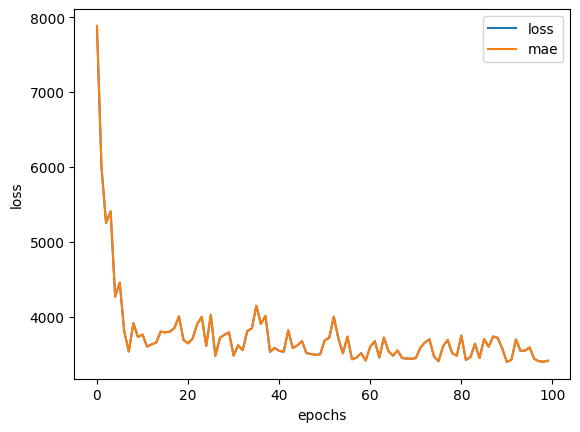

In [67]:
def plot_loss(history):
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");

plot_loss(history)


In [68]:

# Try training for a little longer (100 more epochs)
history_2 = insurance_model.fit(train_features, train_labels, epochs=100, verbose=0)

In [69]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model.evaluate(test_features, test_labels)
insurance_model_2_loss, insurance_model_2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3892.1616 - mae: 3892.1616


(4227.56396484375, 4227.56396484375)

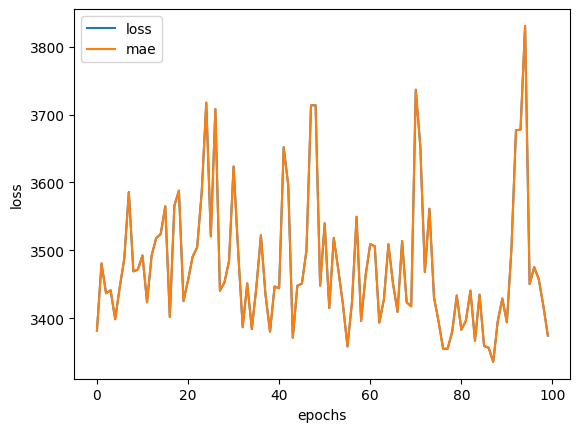

In [70]:
plot_loss(history_2)

There is still some improvements we can think about.

In [71]:
dataset_sklearn = dataset_copy
dataset_sklearn.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [72]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer to preprocess all the data.
column_transformer = make_column_transformer(
    (MinMaxScaler(), ["age"]),
    (MinMaxScaler(), [ "bmi"]),
    (MinMaxScaler(), ["children"]), 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create features and labels
sk_features = dataset_sklearn.drop("charges", axis=1)
sk_labels = dataset_sklearn["charges"]

sk_features.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [73]:

# Sklearn provides also a split function, just like the one we created before.
train_features_sk, test_features_sk, train_label_sk, test_label_sk = train_test_split(sk_features, sk_labels, test_size=0.2, random_state=0)

# Fit column transformer on the training data
column_transformer.fit(train_features_sk)

# Transform training and test data with MinMaxScaler and one hot encoding.
train_features_normalized = column_transformer.transform(train_features_sk)
test_features_normalized = column_transformer.transform(test_features_sk)

We can take a look on how different we have prepared the data now compared to how we did previously. The main difference we see is that instead of having `sex`and `smoker`as boolean, we have it encoded by hot encoding.

In [74]:
train_features_normalized.shape, train_features.shape

((1070, 11), (1070, 9))

In [75]:
train_features_normalized[0],train_features.loc[0]

(array([0.41304348, 0.48802798, 0.8       , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ]),
 age          19.0
 sex           0.0
 bmi          27.9
 children      0.0
 smoker        1.0
 northeast     0.0
 northwest     0.0
 southeast     0.0
 southwest     1.0
 Name: 0, dtype: float64)

In [76]:
train_features_normalized[2],train_features.loc[2]

(array([0.10869565, 0.55716976, 0.4       , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ]),
 age          28.0
 sex           1.0
 bmi          33.0
 children      3.0
 smoker        0.0
 northeast     0.0
 northwest     0.0
 southeast     1.0
 southwest     0.0
 Name: 2, dtype: float64)

Checking the values, we can see the transformation has values that make sense. We have ( as organized in the column transform) `age` , `bmi`, `children` and then two columns for `sex` and for column for `origin` one-hot encoded.

We also make the column transformer for the one-hot encoding. This was was working as expected.

We can create another model and try to compare results.

In [77]:
#insurance_model with SK normalization.

# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

insurance_model_sk = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model_sk.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

# 3. Fit the model

history_sk = insurance_model_sk.fit(train_features_normalized, train_label_sk, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10317.2568 - mae: 10317.2568
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3899.2603 - mae: 3899.2603
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4100.1094 - mae: 4100.1094
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4102.2959 - mae: 4102.2959
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4058.3621 - mae: 4058.3621
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3967.5920 - mae: 3967.5920
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4125.3394 - mae: 4125.3394
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4046.4907 - mae: 4046.4907
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4448.6587 - mae: 4448.6587
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4081.4868 - mae: 4081.4868
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3853.1282 - mae: 3853.1282
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [78]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_sk.evaluate(test_features_normalized, test_label_sk)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3365.0405 - mae: 3365.0405 


In [79]:
insurance_model_2_loss,insurance_model_2_mae

(4227.56396484375, 4227.56396484375)

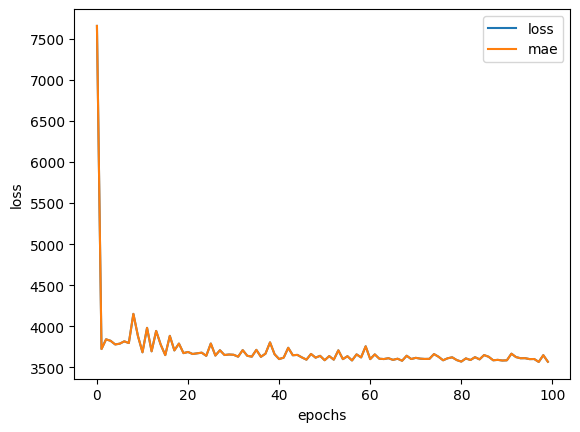

In [80]:
plot_loss(history_sk)

As we did before, let's try to train for another 100 epoch and see how it behaves.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3334.1558 - mae: 3334.1558
3111.8642578125 3111.8642578125


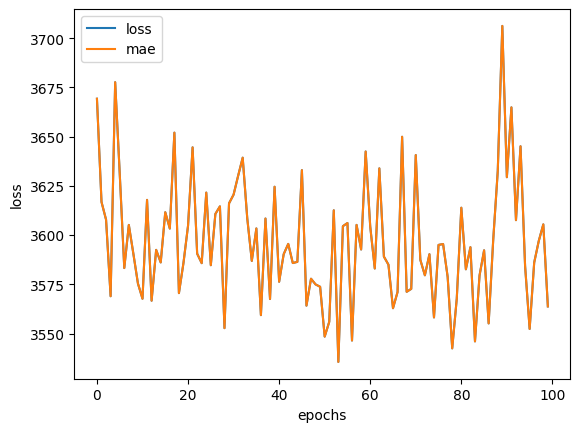

In [81]:
history_sk_2 = insurance_model_sk.fit(train_features_normalized, train_label_sk, epochs=100, verbose=0)

insurance_model_4_loss, insurance_model_4_mae = insurance_model_sk.evaluate(test_features_normalized, test_label_sk)
print(insurance_model_4_loss, insurance_model_4_mae)
plot_loss(history_sk_2)

The 